In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df= pd.read_excel('starbucks.xlsx', sheet_name='Sheet1')
df = df.iloc[:,1:]

Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely
an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free).
Some users might not receive any offer during certain weeks. Not all users receive the same offer


* event (str) - record description (ie offer completed, offer received, offer viewed, etc.) - 한 오퍼가 도착했는지, 보여졌는지, 그 오퍼가 실행되었는지를 나타내는 구간. received와 completed가 같이 있으면 실행된것
* time (int) - time in hours since start of test. The data begins at time t=0 - 이 기록이 시작되고 난 다음에 얼마나 시간이 지났는지를 보여주는 기록. 지속 누적 시간으로 되어있다. 
* offer_id (int) - 10 different IDs
* gender (int) – F:0, M:1, Other:2
* age (int) - age of the customer
* income (float) - customer's income
* member_year (int) - year when customer created an app account\
* reward (int) - reward given for completing an offer
* difficulty (int) - minimum required spend to complete an offer -> 스타벅스의 오퍼에 응하기 위해서 최소로 지불해야 하는 금액 --- 아마 complete 여부와 관계가 있지 않을까? 
* duration (int) - time for offer to be open, in days
* offer_type (int) - type of offer ie 0:BOGO, 1:informational, 2:discount
* types of channel (email, web, mobile, social)
* customer id

즉 스타벅스가 광고의 효과를 알아보기 위해 일종의 실험을 한 자료.

광고의 형태(이메일? 웹? 모바일? 소셜?)와 판촉의 내용 (BOGO?, 정보전달? 할인) 등에 따라 고객의 응답 정도를 예측하고자 하는 것이라고 볼 수 있다. 

$\rightarrow$ 그렇다면 고객이 응한 정도 (complete)를 예측할 수 있도록 자료를 정제해 볼까?
1. 판촉물의 내용 별로 고객의 응답률을 볼 수 있는 분석 -> 응답률 예측?
 

In [3]:
# 2021년 11월 10일에 수집된 자료임을 알 수 있다. 
datetime.date(2017,5,9) + datetime.timedelta(days = 1646)

datetime.date(2021, 11, 10)

In [4]:
df

,event,time,offer_id,gender,age,income,member_year,member_month,member_day,members_since_in_days,member_since_year,reward,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
0,offer received,0,6,0,75,100000,2017,5,9,1646,4,5,5,7,0,1,1,1,0,1
1,offer viewed,6,6,0,75,100000,2017,5,9,1646,4,5,5,7,0,1,1,1,0,1
2,offer completed,132,6,0,75,100000,2017,5,9,1646,4,5,5,7,0,1,1,1,0,1
3,offer received,168,5,0,75,100000,2017,5,9,1646,4,0,0,3,2,1,0,1,1,1
4,offer viewed,216,5,0,75,100000,2017,5,9,1646,4,0,0,3,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148800,offer viewed,504,3,1,47,94000,2017,10,13,1489,4,0,0,4,2,1,1,1,0,14819
148801,offer received,576,4,1,47,94000,2017,10,13,1489,4,10,10,5,0,1,1,1,1,14819
148802,offer viewed,576,4,1,47,94000,2017,10,13,1489,4,10,10,5,0,1,1,1,1,14819
148803,offer received,576,4,0,58,78000,2016,10,20,1847,5,10,10,5,0,1,1,1,1,14820


In [5]:
print(np.sum(df.event == 'offer received') , np.sum(df.event == 'offer viewed'), np.sum(df.event == 'offer completed'))
np.sum(df.event == 'offer received') + np.sum(df.event == 'offer viewed')+ np.sum(df.event == 'offer completed')

66501 49860 32444


148805

## 각 offer의 형태

In [6]:
offer = pd.DataFrame()
for i in range(10):
    offer = pd.concat([offer,df[df.offer_id== i][['offer_id','reward','difficulty','duration','offer_type','email','web','mobile','social']].iloc[0,:]],axis = 1)
offer = np.transpose(offer)
offer.index = range(10)
offer

,offer_id,reward,difficulty,duration,offer_type,email,web,mobile,social
0,0,5,20,10,1,1,1,0,0
1,1,3,7,7,1,1,1,1,1
2,2,2,10,7,1,1,1,1,0
3,3,0,0,4,2,1,1,1,0
4,4,10,10,5,0,1,1,1,1
5,5,0,0,3,2,1,0,1,1
6,6,5,5,7,0,1,1,1,0
7,7,10,10,7,0,1,0,1,1
8,8,5,5,5,0,1,1,1,1
9,9,2,10,10,1,1,1,1,1


In [7]:
ids = pd.DataFrame()
for i in np.sort(np.unique(df.customer_ids)):
    ids = pd.concat([ids,df[df.customer_ids== i][['customer_ids','gender','age','income','member_year','member_month','member_day','members_since_in_days','member_since_year']].iloc[0,:]],axis = 1)
ids = np.transpose(ids)
ids.index = range(len(ids))
ids.head()

,customer_ids,gender,age,income,member_year,member_month,member_day,members_since_in_days,member_since_year
0,1,0,75,100000,2017,5,9,1646,4
1,2,1,68,70000,2018,4,26,1294,3
2,3,1,65,53000,2018,2,9,1370,3
3,4,1,58,51000,2017,11,11,1460,3
4,5,0,61,57000,2017,9,11,1521,4


# 응답률을 계산하고 이를 예측하는 모델을 만들어보자 
1. 오퍼 종류 별 다른 확률 계산하기?


In [8]:
# event의 개수는 총 3개. 
np.unique(df.event)

array(['offer completed', 'offer received', 'offer viewed'], dtype=object)

In [9]:
# 멤버 id별로 member_year, member_month,,,  등등은 항상 같은 값을 가지고 있다. 즉 로그데이터는 아니고 한 시점에서 측정한 데이터라는 이야기. 즉 id별로 통합 분석을 해야한다는 뜻이다. 
# 이는 인컴 등 개인 신상자료는 모두 마찬가지이다.
df_bogo = df[df.offer_type == 0] # bogo
df_info = df[df.offer_type == 1] # discount 같고
df_disc = df[df.offer_type == 2] # 이게 info 같고

In [10]:
df_disc

,event,time,offer_id,gender,age,income,member_year,member_month,member_day,members_since_in_days,member_since_year,reward,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
3,offer received,168,5,0,75,100000,2017,5,9,1646,4,0,0,3,2,1,0,1,1,1
4,offer viewed,216,5,0,75,100000,2017,5,9,1646,4,0,0,3,2,1,0,1,1,1
13,offer received,336,3,1,68,70000,2018,4,26,1294,3,0,0,4,2,1,1,1,0,2
37,offer received,0,3,1,58,51000,2017,11,11,1460,3,0,0,4,2,1,1,1,0,4
48,offer received,336,5,0,61,57000,2017,9,11,1521,4,0,0,3,2,1,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148754,offer viewed,582,3,0,37,90000,2015,8,25,2269,6,0,0,4,2,1,1,1,0,14807
148770,offer received,504,5,1,75,116000,2017,5,29,1626,4,0,0,3,2,1,0,1,1,14811
148771,offer viewed,618,5,1,75,116000,2017,5,29,1626,4,0,0,3,2,1,0,1,1,14811
148799,offer received,504,3,1,47,94000,2017,10,13,1489,4,0,0,4,2,1,1,1,0,14819


In [11]:
# offer를 상대방이 읽기도 전에 complete 한 경우??  잘못 기록된 것도 있는듯. 
df_bogo[(df_bogo.customer_ids == 1) & (df_bogo.offer_id == 8)]

,event,time,offer_id,gender,age,income,member_year,member_month,member_day,members_since_in_days,member_since_year,reward,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
7,offer received,504,8,0,75,100000,2017,5,9,1646,4,5,5,5,0,1,1,1,1,1
9,offer completed,510,8,0,75,100000,2017,5,9,1646,4,5,5,5,0,1,1,1,1,1
10,offer viewed,582,8,0,75,100000,2017,5,9,1646,4,5,5,5,0,1,1,1,1,1


In [12]:
# 모든 오퍼가 received - viewd - completed의 세 단계로 이루어져 있는 것이 아님. -> received와 completed만 분석에 활용해볼까? 
df_bogo[df_bogo.customer_ids == 114]

,event,time,offer_id,gender,age,income,member_year,member_month,member_day,members_since_in_days,member_since_year,reward,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
1258,offer received,408,7,0,57,89000,2016,3,29,2052,5,10,10,7,0,1,0,1,1,114
1259,offer completed,474,7,0,57,89000,2016,3,29,2052,5,10,10,7,0,1,0,1,1,114


In [13]:
# offer_ id가 광고를 보낸 형태인 듯.. 즉 offer 별로 어떤 채널을 통해 보냈는지, 어떤 판촉을 사용했는지가 동일함. 그럼 id별로 응답률을 예측해서 해당 인원에게 어떤 offer 형태가 가장 효과가 좋은지 예측해볼까? 
np.unique(df_bogo.offer_id) # 4,6,7,8
np.unique(df_info.offer_id) # 0,1,2,9
np.unique(df_disc.offer_id) # 3,5

array([3, 5])

# 데이터 전처리 - Offer 별 데이터 프레임 형성 및 Response_rate 추가

In [14]:
df_for_each_offer = []
offer_ids = list(range(10))
for i in range(len(offer_ids)):
    df_for_each_offer.append(df[df.offer_id == offer_ids[i]])


In [15]:
data = []
for order in range(len(offer_ids)):
    df0 = df_for_each_offer[order]
    c_ids = np.sort(np.unique(df0.customer_ids))
    data_temp = pd.DataFrame(np.zeros((len(c_ids),6)),columns = ['customer_ids','gender', 'age','income','members_since_in_days','response_rate'])

    for i in range(len(c_ids)):
        temp_df = df0[df0.customer_ids == c_ids[i]]
        res_rate = np.sum(temp_df.event == 'offer completed')/np.sum(temp_df.event == 'offer received')
        data_temp.iloc[i,:] = [temp_df.customer_ids.iloc[0], temp_df.gender.iloc[0],temp_df.age.iloc[0],temp_df.income.iloc[0],temp_df.members_since_in_days.iloc[0], res_rate]
    data.append(data_temp)

In [16]:
# res_rates of offer 3 and 5
print(np.unique(data[3].response_rate),
      np.unique(data[5].response_rate))

[0.] [0.]


Text(0.5, 1.0, 'Histogram of response_rate')

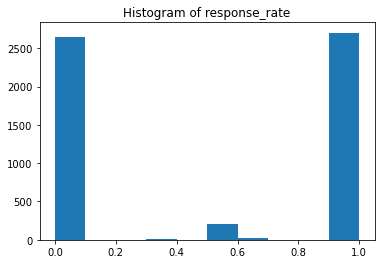

In [17]:
plt.hist(data[0].response_rate)
plt.title('Histogram of response_rate')

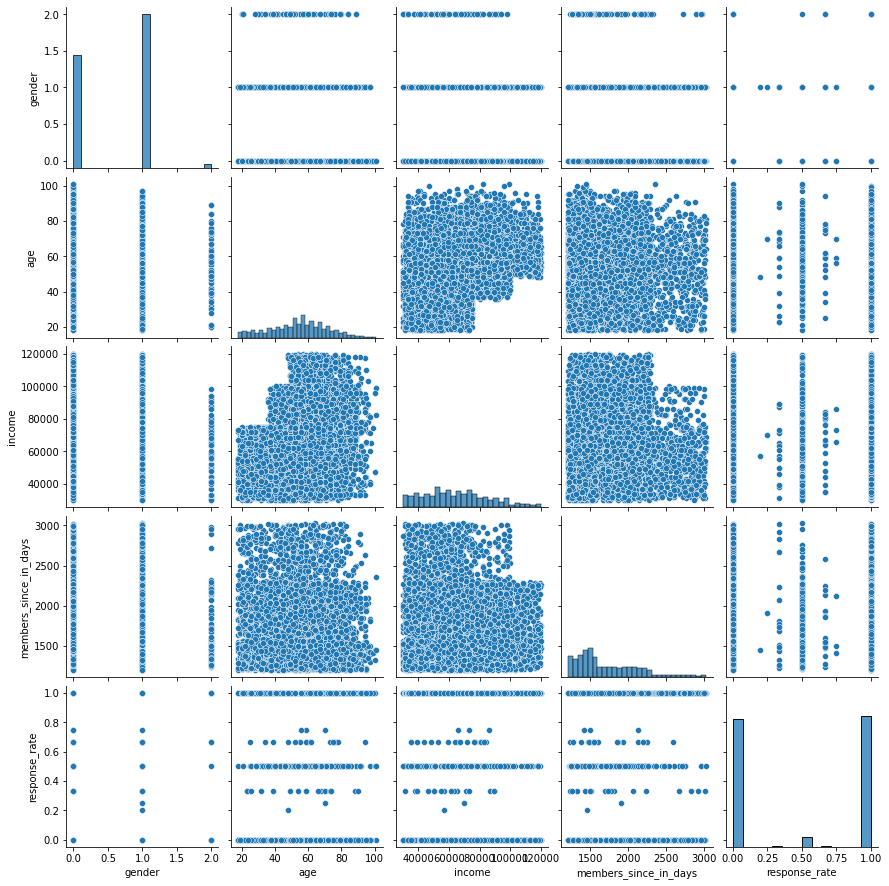

In [18]:
sns.pairplot(data[0].drop('customer_ids', axis = 1))

# 각 데이터 별 Train data, Test data 분할

In [19]:
data_tr = []
data_tst = []

for i in range(len(data)):
    df_temp = data[i]
    cus_ids = np.sort(np.unique(df_temp.customer_ids))

    random.seed(1)
    train_ids = np.sort(random.sample(list(cus_ids), int(len(cus_ids) * 0.7)))
    test_ids = [x for x in cus_ids if not(x in train_ids)]

    data_tr_temp = df_temp[df_temp.customer_ids.isin(train_ids)]
    data_tr_temp.index = range(len(data_tr_temp))
    data_tst_temp = df_temp[df_temp.customer_ids.isin(test_ids)]
    data_tst_temp.index = range(len(data_tst_temp))
    
    data_tr.append(data_tr_temp)
    data_tst.append(data_tst_temp)

# Modeling - 각 offer 별 응답률 예측

## Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
mod_tree = []
MSE_tree = []

for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = DecisionTreeRegressor(ccp_alpha=0.005)
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_tree.append(mod)
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_tree.append(MSE)


In [22]:
mod_tree

[DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005),
 DecisionTreeRegressor(ccp_alpha=0.005)]

In [23]:
MSE_tree

[341.12892655401896,
 249.31776843057392,
 333.5040616950181,
 0.0,
 324.1084714425609,
 0.0,
 337.3674287259738,
 331.0949717974411,
 305.72631078956476,
 245.43022631889542]

## Bagging

In [24]:
from sklearn.ensemble import BaggingRegressor

In [25]:
mod_bag = []
MSE_bag = []


for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = BaggingRegressor(n_estimators= 1000)
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_bag.append(mod)
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_bag.append(MSE)


In [26]:
mod_bag

[BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000),
 BaggingRegressor(n_estimators=1000)]

In [27]:
MSE_bag

[349.5653771772222,
 261.84929254305837,
 340.4836132634807,
 0.0,
 331.63123786805556,
 0.0,
 353.9760644375,
 332.4855678472222,
 328.1169332952778,
 256.50559997222217]

## RF

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
mod_rf = []
MSE_rf = []
feature_importance_rf = []

for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = RandomForestRegressor(n_estimators= 1000)
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    feature_importance_rf.append(mod.feature_importances_)
    mod_rf.append(mod)
    
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_rf.append(MSE)


In [30]:
mod_rf

[RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000),
 RandomForestRegressor(n_estimators=1000)]

In [31]:
MSE_rf

[349.2575867688889,
 261.48256931435094,
 340.4002339133333,
 0.0,
 333.0710141388889,
 0.0,
 353.36679312499996,
 332.72425058333334,
 328.4764186261111,
 257.5646780277778]

In [32]:
pd.DataFrame(feature_importance_rf, columns=['gender','age','income','members_since_in_days'])

,gender,age,income,members_since_in_days
0,0.038006,0.237710,0.277408,0.446877
1,0.035481,0.234351,0.232503,0.497666
2,0.038658,0.244017,0.263530,0.453794
3,0.000000,0.000000,0.000000,0.000000
4,0.045463,0.231553,0.296381,0.426603
5,0.000000,0.000000,0.000000,0.000000
6,0.040868,0.256852,0.259561,0.442719
7,0.046672,0.238754,0.301866,0.412708
8,0.033126,0.240865,0.244474,0.481536
9,0.029188,0.227543,0.223320,0.519949


Text(0.5, 1.0, 'OFFER 9')

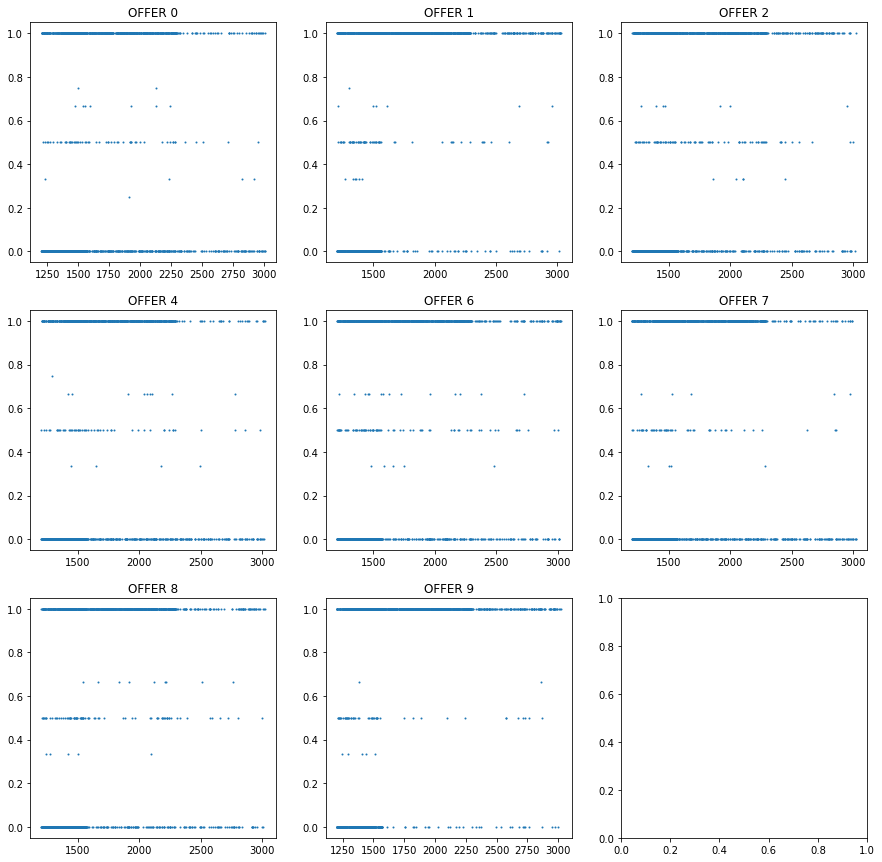

In [33]:
fig, axes = plt.subplots(3, 3, figsize = [15,15])
axes[0,0].scatter(data_tst[0].members_since_in_days,data_tst[0].response_rate,s = 1)
axes[0,0].set_title('OFFER 0')
axes[0,1].scatter(data_tst[1].members_since_in_days,data_tst[1].response_rate,s = 1)
axes[0,1].set_title('OFFER 1')
axes[0,2].scatter(data_tst[2].members_since_in_days,data_tst[2].response_rate,s = 1)
axes[0,2].set_title('OFFER 2')
axes[1,0].scatter(data_tst[4].members_since_in_days,data_tst[4].response_rate,s = 1)
axes[1,0].set_title('OFFER 4')
axes[1,1].scatter(data_tst[6].members_since_in_days,data_tst[6].response_rate,s = 1)
axes[1,1].set_title('OFFER 6')
axes[1,2].scatter(data_tst[7].members_since_in_days,data_tst[7].response_rate,s = 1)
axes[1,2].set_title('OFFER 7')
axes[2,0].scatter(data_tst[8].members_since_in_days,data_tst[8].response_rate,s = 1)
axes[2,0].set_title('OFFER 8')
axes[2,1].scatter(data_tst[9].members_since_in_days,data_tst[9].response_rate,s = 1)
axes[2,1].set_title('OFFER 9')

## Adaboost

In [34]:
from sklearn.ensemble import AdaBoostRegressor

In [35]:
mod_ada = []
MSE_ada = []

for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = AdaBoostRegressor(n_estimators= 100)
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_ada.append(mod)
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_ada.append(MSE)

In [36]:
mod_ada

[AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100),
 AdaBoostRegressor(n_estimators=100)]

In [37]:
MSE_ada

[336.65219934302684,
 240.13786830785529,
 330.6731465973709,
 0.0,
 320.3006453146642,
 0.0,
 331.5793805796681,
 329.2609157504642,
 298.67757498368394,
 236.27314839607828]

## Gradient Boost

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
mod_gb = []
MSE_gb = []

for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = GradientBoostingRegressor(n_estimators=100)
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_gb.append(mod)
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_gb.append(MSE)

In [40]:
mod_gb

[GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor()]

In [41]:
MSE_gb

[317.1928648882926,
 240.13451823146366,
 312.9308083576999,
 0.0,
 297.8721922015805,
 0.0,
 324.0638958281787,
 297.98975642876957,
 296.08639466920874,
 235.49363876167294]

## XGBoost

In [42]:
from xgboost import XGBRegressor

In [43]:
mod_xgb = []
MSE_xgb = []
pred_xgb = []

for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = XGBRegressor(n_estimators=100, n_jobs = 1, max_depth = 1,learning_rate=0.1, objective = 'reg:squarederror')
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_xgb.append(mod)
    pred_xgb.append(pred_y)
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_xgb.append(MSE)

In [44]:
MSE_xgb

[316.77178993027076,
 237.61388925767756,
 310.69375496716293,
 2.941185818703229e-07,
 301.6321267439579,
 2.9376568031539374e-07,
 325.91906058426036,
 297.87458526946847,
 295.8043829918469,
 235.9439675534639]

## light gbm

In [45]:
from lightgbm import LGBMRegressor

In [46]:
mod_lgbm = []
MSE_lgbm = []

for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = LGBMRegressor(n_estimators= 100)
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_lgbm.append(mod)
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_lgbm.append(MSE)

In [47]:
mod_lgbm

[LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor(),
 LGBMRegressor()]

In [48]:
MSE_lgbm

[333.575349034346,
 254.20689109561135,
 332.9168304352911,
 0.0,
 314.3339892805052,
 0.0,
 341.8630965578027,
 312.3685739421903,
 317.66677068748237,
 248.36200214976728]

## catboost

In [49]:
from catboost import CatBoostRegressor

In [50]:
mod_cb = []
MSE_cb = []

for offer in range(len(data)):
    if (offer == 3) | (offer == 5):
        mod_cb.append(0)
        MSE_cb.append(0)
        continue
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = CatBoostRegressor(n_estimators= 100)
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_cb.append(mod)
    

    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_cb.append(MSE)

Learning rate set to 0.330188
0:	learn: 0.4643422	total: 51.5ms	remaining: 5.1s
1:	learn: 0.4482460	total: 52.6ms	remaining: 2.58s
2:	learn: 0.4403646	total: 53.5ms	remaining: 1.73s
3:	learn: 0.4340495	total: 54.3ms	remaining: 1.3s
4:	learn: 0.4300745	total: 55.1ms	remaining: 1.05s
5:	learn: 0.4275668	total: 56ms	remaining: 877ms
6:	learn: 0.4266020	total: 56.9ms	remaining: 755ms
7:	learn: 0.4251196	total: 57.7ms	remaining: 664ms
8:	learn: 0.4232504	total: 58.6ms	remaining: 593ms
9:	learn: 0.4223958	total: 59.5ms	remaining: 535ms
10:	learn: 0.4216290	total: 60.3ms	remaining: 488ms
11:	learn: 0.4208211	total: 61.1ms	remaining: 448ms
12:	learn: 0.4201552	total: 61.9ms	remaining: 414ms
13:	learn: 0.4192828	total: 62.7ms	remaining: 385ms
14:	learn: 0.4188312	total: 63.5ms	remaining: 360ms
15:	learn: 0.4182519	total: 64.4ms	remaining: 338ms
16:	learn: 0.4180164	total: 65.2ms	remaining: 318ms
17:	learn: 0.4175486	total: 66.1ms	remaining: 301ms
18:	learn: 0.4167795	total: 66.9ms	remaining: 28

In [51]:
mod_cb

 0,
 0,

In [52]:
MSE_cb

[336.3990167937442,
 248.79694536527904,
 323.9087607477846,
 0,
 312.64723664348634,
 0,
 335.98862746746227,
 316.36016651306704,
 308.79358925079976,
 246.10261270865405]

## SVM

In [53]:
from sklearn.svm import SVR

In [54]:
mod_svm = []
MSE_svm = []
Cs = [1,5,10]

for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)
    X_tst = scaler.transform(X_tst)
    for c in Cs:
        mod = SVR(C = c)
        mod.fit(X,y)
        pred_y = mod.predict(X_tst)
        mod_svm.append(mod)
        # MSE
        MSE = np.sum((y_tst - pred_y)**2)
        MSE_svm.append(MSE)


    

In [55]:
mod_svm = np.reshape(mod_svm,(10,3))

In [56]:
mod_svm = mod_svm[:,0]

In [57]:
MSE_svm = np.reshape(MSE_svm,(10,3))

In [58]:
MSE_svm = MSE_svm[:,0]

In [59]:
## NN

In [60]:
from sklearn.neural_network import MLPRegressor

In [61]:
mod_nn = []
MSE_nn = []
for offer in range(len(data)):
    temp_data = data_tr[offer]
    temp_data_tst = data_tst[offer]
    y = temp_data['response_rate']
    X = temp_data.drop(['customer_ids','response_rate'],axis = 1)

    y_tst = temp_data_tst['response_rate']
    X_tst = temp_data_tst.drop(['customer_ids','response_rate'],axis = 1)

    mod = MLPRegressor(hidden_layer_sizes=(5,5,5,5,5,5))
    mod.fit(X,y)
    pred_y = mod.predict(X_tst)
    mod_nn.append(mod)
    # MSE
    MSE = np.sum((y_tst - pred_y)**2)
    MSE_nn.append(MSE)

/Users/hyeonki/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
mod_nn

[MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5)),
 MLPRegressor(hidden_layer_sizes=(5, 5, 5, 5, 5, 5))]

In [63]:
MSE_nn

[402.1783265759941,
 465.88738905728803,
 359.2777757445423,
 77.52932002236669,
 399.4493737779975,
 0.0001004596165898341,
 378.04894654363414,
 422.8473082733835,
 572.4091696370695,
 268.8545535507659]

In [64]:
MSE_df = np.zeros((len(offer_ids),10))
for i in range(len(offer_ids)):
    MSE_df[i,0] = MSE_tree[i]
    MSE_df[i,1] = MSE_bag[i]
    MSE_df[i,2] = MSE_rf[i]
    MSE_df[i,3] = MSE_ada[i]
    MSE_df[i,4] = MSE_gb[i]
    MSE_df[i,5] = MSE_xgb[i]
    MSE_df[i,6] = MSE_lgbm[i]
    MSE_df[i,7] = MSE_cb[i]
    MSE_df[i,8] = MSE_svm[i]
    MSE_df[i,9] = MSE_nn[i]
    
MSE_df = pd.DataFrame(MSE_df, columns=['tree','bagging','random forest','ada boost','gradient boost','XGBoost','lgbm','Catboost','SVM','Neural Network'])

In [65]:
MSE_df

,tree,bagging,random forest,ada boost,gradient boost,XGBoost,lgbm,Catboost,SVM,Neural Network
0,341.128927,349.565377,349.257587,336.652199,317.192865,3.167718e+02,333.575349,336.399017,353.169228,402.178327
1,249.317768,261.849293,261.482569,240.137868,240.134518,2.376139e+02,254.206891,248.796945,275.762928,465.887389
2,333.504062,340.483613,340.400234,330.673147,312.930808,3.106938e+02,332.916830,323.908761,348.864971,359.277776
3,0.000000,0.000000,0.000000,0.000000,0.000000,2.941186e-07,0.000000,0.000000,0.000000,77.529320
4,324.108471,331.631238,333.071014,320.300645,297.872192,3.016321e+02,314.333989,312.647237,331.260710,399.449374
5,0.000000,0.000000,0.000000,0.000000,0.000000,2.937657e-07,0.000000,0.000000,0.000000,0.000100
6,337.367429,353.976064,353.366793,331.579381,324.063896,3.259191e+02,341.863097,335.988627,394.357100,378.048947
7,331.094972,332.485568,332.724251,329.260916,297.989756,2.978746e+02,312.368574,316.360167,344.731455,422.847308
8,305.726311,328.116933,328.476419,298.677575,296.086395,2.958044e+02,317.666771,308.793589,328.198068,572.409170
9,245.430226,256.505600,257.564678,236.273148,235.493639,2.359440e+02,248.362002,246.102613,270.600247,268.854554


In [66]:
for i in range(len(offer_ids)):
    if i in [3,5]:
        continue
    print(f'Best model for offer {offer_ids[i]} is {MSE_df.columns[np.argmin(MSE_df.iloc[i,:])]}')

Best model for offer 0 is XGBoost
Best model for offer 1 is XGBoost
Best model for offer 2 is XGBoost
Best model for offer 4 is gradient boost
Best model for offer 6 is gradient boost
Best model for offer 7 is XGBoost
Best model for offer 8 is XGBoost
Best model for offer 9 is gradient boost


In [67]:
#best models
best_mod = []
best_mod.append(mod_xgb[0])
best_mod.append(mod_xgb[1])
best_mod.append(mod_xgb[2])
best_mod.append(0)
best_mod.append(mod_gb[4])
best_mod.append(0)
best_mod.append(mod_gb[6])
best_mod.append(mod_xgb[7])
best_mod.append(mod_xgb[8])
best_mod.append(mod_gb[9])

In [68]:
X_tst = data_tst[1].drop(['customer_ids','response_rate'],axis = 1).iloc[2,:]
X_tst

gender                       1.0
age                         22.0
income                   70000.0
members_since_in_days     1507.0
Name: 2, dtype: float64

In [69]:
# offer_recommend
predict_res = []
for i in range(10):
    if i in [3,5]:
        predict_res.append(0)
        continue
    predict_res.append(best_mod[i].predict(np.transpose(pd.DataFrame(X_tst)))[0])

large_3_idx = list(np.argsort(-np.array(predict_res))[:3])

print(f'Recommended offers for this person are {offer_ids[large_3_idx[0]]}, {offer_ids[large_3_idx[1]]} and {offer_ids[large_3_idx[2]]}')
print(f'whose expected response rates are {predict_res[large_3_idx[0]].round(3)}, {np.round(predict_res[large_3_idx[1]], 3)} and {np.round(predict_res[large_3_idx[2]], 3)}')

Recommended offers for this person are 9, 1 and 8
whose expected response rates are 0.631, 0.6150000095367432 and 0.5040000081062317
